In [3]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

In [4]:
pwd

'H:\\tianchi\\fashion-tag'

In [5]:
BASE_DATA_FOLDER = ".\\train"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "Images")

In [6]:
images_per_class = {}
width = 299
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image_bgr = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR),(width, width))# 读取照片
        images_per_class[class_label].append(image_bgr) # 加入list 

In [7]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

neckline_design_labels -> 96
skirt_length_labels -> 96


In [8]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1   

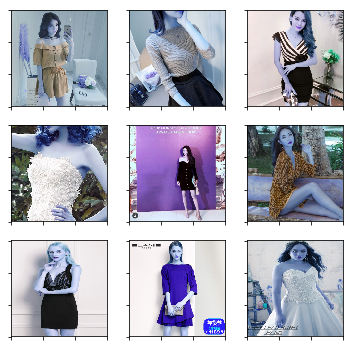

In [16]:
plot_for_class("neckline_design_labels")

## 对图片进行相应的裁剪

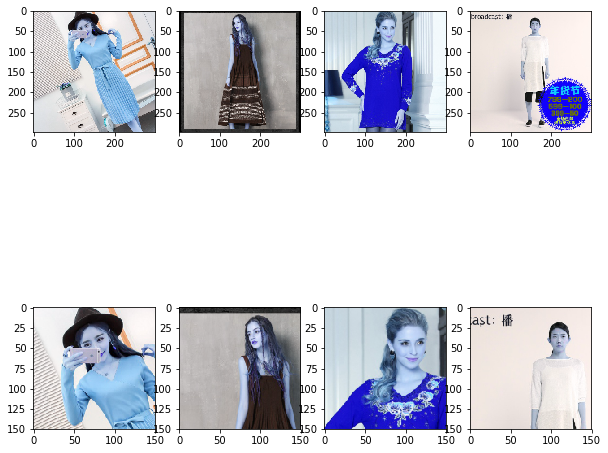

In [28]:
image = images_per_class["neckline_design_labels"][40] # cv2.imread（）将以BGR模式读取图像
image1 = images_per_class["neckline_design_labels"][50]
image2 = images_per_class["neckline_design_labels"][60]
image3 = images_per_class["neckline_design_labels"][70]
# print(image.shape)

cropped = image[0:150, 50:200]
cropped1 = image1[0:150, 50:200]
cropped2 = image2[0:150, 50:200]
cropped3 = image3[0:150, 50:200]
# cv2.imshow("cropped", cropped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

fig, axs = plt.subplots(2, 4, figsize=(10, 10))
axs[0,0].imshow(image)
axs[0,1].imshow(image1)
axs[0,2].imshow(image2)
axs[0,3].imshow(image3)
axs[1,0].imshow(cropped)
axs[1,1].imshow(cropped1)
axs[1,2].imshow(cropped2)
axs[1,3].imshow(cropped3)

## 使用grabcut算法进行前后景分离

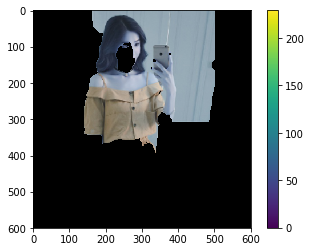

(<matplotlib.image.AxesImage at 0x4984ac8>,
 None)

In [21]:
img = cv2.resize(images_per_class["neckline_design_labels"][0],(600, 600))
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (100,0,400,400)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

## RGB、HSV和GRAY三种模式显示图片

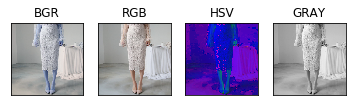

In [42]:
image = images_per_class["skirt_length_labels"][20] # cv2.imread（）将以BGR模式读取图像
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 转换成RGB模式
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 转换成HSV空间
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # 灰度图

titles = ['BGR','RGB','HSV','GRAY']
images = [image, image_rgb, image_hsv, image_gray]

for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# fig, axs = plt.subplots(1, 4, figsize=(20, 20))
# axs[0].imshow(image_rgb)
# axs[1].imshow(image)
# axs[2].imshow(image_hsv)
# axs[3].imshow(image_gray)

In [41]:
image_gray.shape

(299, 299)

## 基于皮肤颜色抠图,效果较差

In [96]:
BASE_DATA_FOLDER = ".\\train"
TRAin_DATA_FOLDER = os.path.join(BASE_DATA_FOLDER, "Images")

In [119]:
images_per_class = {}
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    for image_path in glob(os.path.join(class_folder_path, "*.jpg")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR) # 读取照片
        images_per_class[class_label].append(image_bgr) # 加入list 

In [26]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

skirt_length_labels -> 96


In [27]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1   

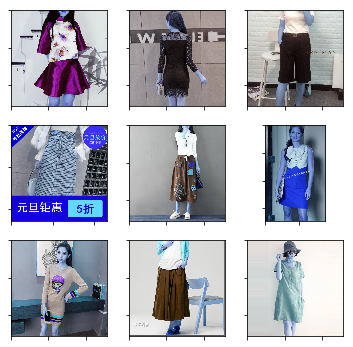

In [28]:
plot_for_class("skirt_length_labels")

In [40]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 将图片转换成HSV空间 

    # We have to set a range, which color should be detected: green
    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image) # 创建掩膜
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image): # 锐化，使得图片的边缘更加的清晰
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

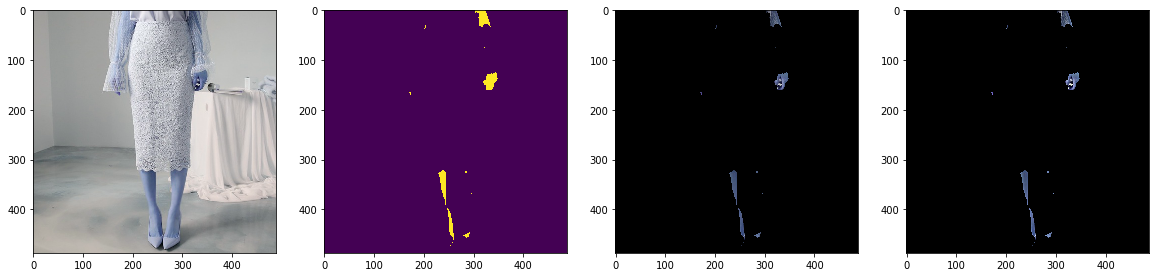

In [41]:
# Test image to see the changes
image = images_per_class["skirt_length_labels"][20]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

### 使用分水岭算法抠图，效果比较差，裙子和腿之间的关系体现不了

In [64]:
img = cv2.imread('000c8ed315fb0b2d931d5c348a27e5c7.jpg')
mySegmenter = Segmenter()
# 获取前景图片
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurImg = cv2.blur(grayImg, (3, 3))
_, binImg = cv2.threshold(blurImg, 30, 255, cv2.THRESH_BINARY_INV)
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
fgImg = cv2.morphologyEx(binImg, cv2.MORPH_CLOSE, kernel1)
# 获取背景图片
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilateImg = cv2.dilate(binImg, kernel2, iterations=4)
_, bgImg = cv2.threshold(dilateImg, 1, 128, cv2.THRESH_BINARY_INV)
# 合成掩膜
maskImg = cv2.add(fgImg, bgImg)
mySegmenter.setMark(maskImg)
# 进行分水岭操作 并获得分割图像
mySegmenter.waterProcess(img)
waterSegmentationImg = mySegmenter.getWaterSegmentationImg()
outputImgWhite = mySegmenter.mergeSegmentationImg(waterSegmentationImg,True)
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
dilateImg = cv2.dilate(waterSegmentationImg, kernel3)
_, dilateImg = cv2.threshold(dilateImg, 130, 255, cv2.THRESH_BINARY)
# 寻找轮廓
getBoundingRect(dilateImg, img)
cv2.imshow('Contours Image', dilateImg)
cv2.imshow('White Image', outputImgWhite)
cv2.imshow('Mask Image', maskImg)
cv2.imshow('Output Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

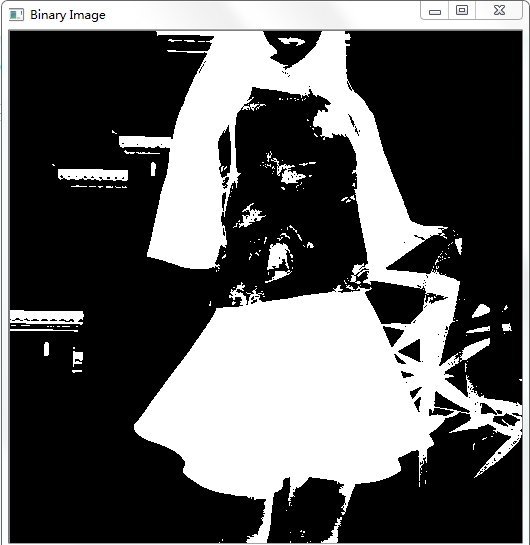